In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [246]:
boston = load_boston()
df_data = pd.DataFrame(boston.data,columns=boston.feature_names)
df_target = pd.DataFrame(boston.target)
n = len(df_data)
n_test = int(0.2*n)
n_train = n - n_test

df_target_train = df_target.iloc[:n_train].copy()
df_target_test = df_target.iloc[n_train:].copy()

In [247]:
def split_train_test(data):
    df_train = data.iloc[:n_train].copy()
    df_test = data.iloc[n_train:].copy()
    return df_train,df_test


In [257]:
reg = LinearRegression()

In [258]:
def linear_reg(df_train):
    reg.fit(df_train,df_target_train)

In [259]:
def predict(df_test):
    return pd.DataFrame(reg.predict(df_test))

In [260]:
def rmse(df_predict):
    mse = mean_squared_error(df_target_test,df_predict)
    return np.sqrt(mse)

In [274]:
def r_sq_score(df_predict):
    return r2_score(df_target_test, df_predict,multioutput='variance_weighted')

In [275]:
final_rmse = None
final_r2 = None
final_df_predict = None
final_df_test = None
final_feature_name = None

In [291]:
def plot():
    global final_rmse 
    global final_r2 
    global final_df_predict 
    global final_df_test
    global final_feature_name
    print('Most optimum col is: '+final_feature_name)
    print('R-Squared Value is: '+str(final_r2))
    print('RMSE Value is: '+str(final_rmse))
    plt.scatter(final_df_test,final_df_predict)
    plt.title("Scatter Plot of test data and predicted value")
    plt.xlabel(final_feature_name)
    plt.ylabel("MEDV")
    plt.show()

In [292]:
def start_reg() :
    global final_rmse 
    global final_r2 
    global final_df_predict 
    global final_df_test
    global final_feature_name
    for col in df_data.columns.values :
        df_x = df_data[col].copy().to_frame(col)

        df_x_train, df_x_test = split_train_test(df_x)
        linear_reg(df_x_train)

        df_y_predict = predict(df_x_test)
        rmseVal = rmse(df_y_predict)
        r2 = r_sq_score(df_y_predict)

        if final_r2 == None or (r2>final_r2):
            final_r2 = r2
            final_df_test = df_x_test.values
            final_df_predict = df_y_predict.values
            final_feature_name = col
            final_rmse =  rmseVal
    plot()

Most optimum col is: LSTAT
R-Squared Value is: 0.1267686994684042
RMSE Value is: 4.818480101222461


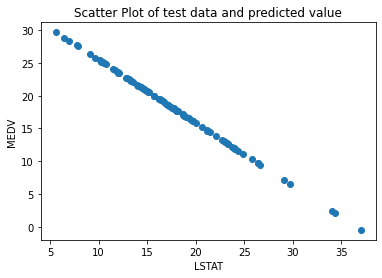

In [293]:
start_reg()